In [1]:
import sys

sys.path.remove('/usr/local/lib/python3.9/site-packages')
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [2]:
import os
import glob
import datetime

import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import mean_absolute_error

In [3]:
data_dir = '../sar_2_ndvi/oushu/time_series'

# Aggregate data

In [4]:
def cal_ndvi(img_r, img_ir):
    return (img_ir - img_r) / (img_ir + img_r + (1e-7)) # avoid zero division error

def standarlization(img_2d):
    return (img_2d - np.min(img_2d)) / (np.max(img_2d) - np.min(img_2d))

def drop_resolution(img_1ch, scale=25):
    h, w = img_1ch.shape
    h_, w_ = h//scale, w//scale
    img_small = np.zeros((h_, w_))
    
    for i in range(h_):
        for j in range(w_):
            img_small[i, j] = np.mean(img_1ch[i*scale:(i+1)*scale, j*scale:(j+1)*scale])
            
    img_resized = img_small.repeat(scale, axis=0).repeat(scale, axis=1)
    return img_resized, img_small

def interpolate_img(img):
    # mask for interpolate location
    mask_neg = np.where(img<0, 1, 0)
    mask_nan = np.where(np.isnan(img), 1, 0)
    mask = (mask_nan + mask_neg)
    if np.sum(mask)==0:
        return img
    else:
        mask = np.where(mask==0,0,1).astype(np.uint8)
        img = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS) # cv2.INPAINT_TELEA
        return img
    
def resize_array_3d(array_3d, h, w):
    img_list = []
    for img in array_3d:
        img_resized = cv2.resize(img, dsize=(w, h), interpolation=cv2.INTER_LINEAR)
        img_list.append(img_resized)
    return np.array(img_list)

In [127]:
# for time-series (Tsumagoi)
for data_type in ['terra_year', 'aqua_year']:
    
    ndvi_list = []
    path_list = glob.glob(os.path.join(data_dir, data_type, 'bin/*.npy'))
    path_list.sort()
    
    for path in path_list:
        img = np.load(path)
        img_r = interpolate_img(img[0])
        img_ir = interpolate_img(img[1])
        img_ndvi = cal_ndvi(img_r, img_ir)
#         img_ndvi, img_ndvi_small = drop_resolution(img_ndvi)
        
#         ndvi_list.append(img_ndvi_small)
    ndvi_list.append(img_ndvi)
    np.save(os.path.join(data_dir, data_type, 'all.npy'), np.array(ndvi_list))

/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


In [21]:
# for general
data_dir = '../sar_2_ndvi/biei/modis'

ndvi_list = []
path_list = glob.glob(os.path.join(data_dir, 'bin/pixel_resized/*.npy'))
path_list.sort()

for path in path_list:
    img = np.load(path)
    
    img_r = interpolate_img(img[0])
    img_ir = interpolate_img(img[1])
    img_ndvi = cal_ndvi(img_r, img_ir)

    ndvi_list.append(img_ndvi)
np.save(os.path.join(data_dir, 'bin/all.npy'), np.array(ndvi_list))

# Visualize

In [143]:
imgs_terra = np.load('/Users/ryotanomura/沖研/satellite/sar_2_ndvi/tsumagoi/time_series/terra_year/all.npy')
imgs_aqua = np.load('/Users/ryotanomura/沖研/satellite/sar_2_ndvi/tsumagoi/time_series/aqua_year/all.npy')

terra_date_list = [datetime.datetime.strptime('2020'+path[-8:-4], '%Y%m%d') for path in sorted(glob.glob(os.path.join(data_dir, 'terra_year', 'bin/*.npy')))]
aqua_date_list = [datetime.datetime.strptime('2020'+path[-8:-4], '%Y%m%d') for path in sorted(glob.glob(os.path.join(data_dir, 'aqua_year', 'bin/*.npy')))]

imgs_all = np.concatenate([imgs_terra, imgs_aqua], 0)
all_date_list = np.concatenate([terra_date_list, aqua_date_list], 0)

2020-01-01 00:00:00


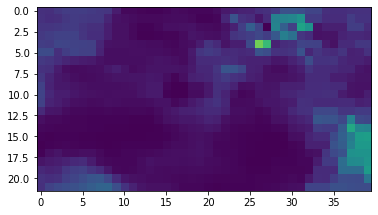

2020-01-02 00:00:00


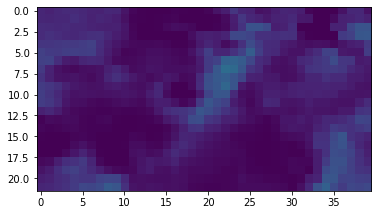

2020-01-04 00:00:00


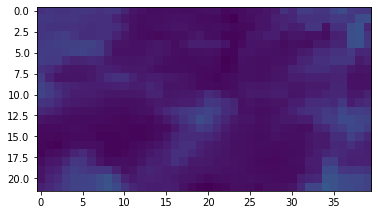

2020-01-06 00:00:00


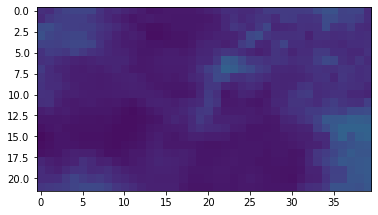

2020-01-11 00:00:00


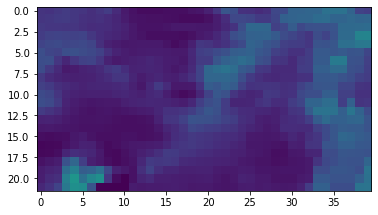

2020-01-13 00:00:00


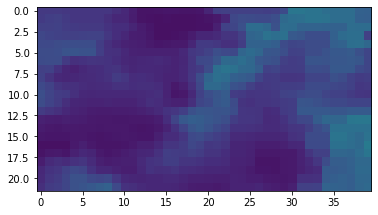

2020-01-14 00:00:00


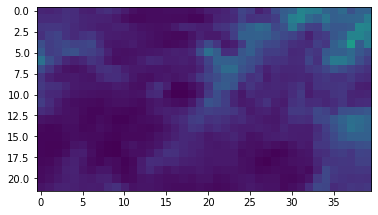

2020-01-16 00:00:00


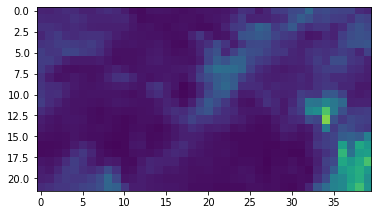

2020-01-19 00:00:00


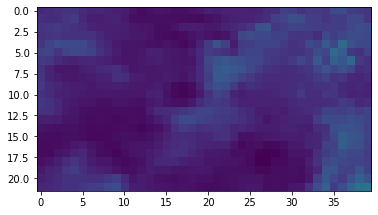

2020-01-20 00:00:00


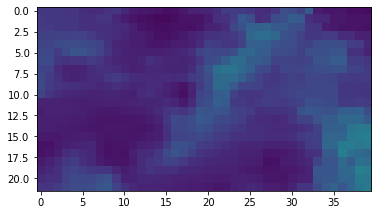

2020-01-26 00:00:00


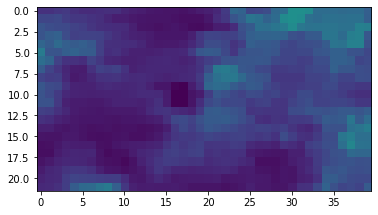

2020-01-30 00:00:00


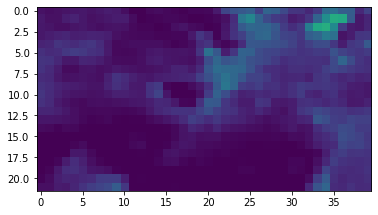

2020-02-01 00:00:00


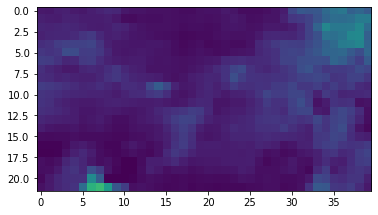

2020-02-03 00:00:00


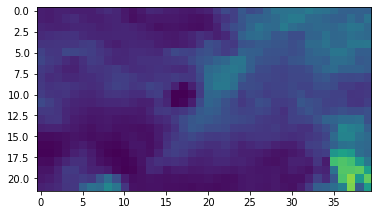

2020-02-04 00:00:00


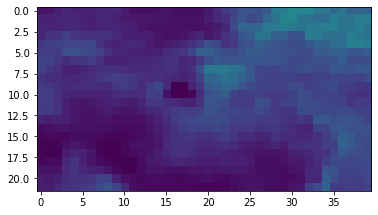

2020-02-11 00:00:00


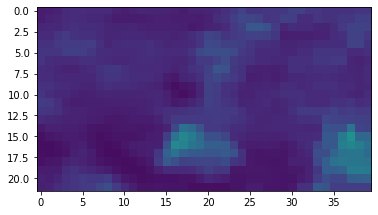

2020-02-12 00:00:00


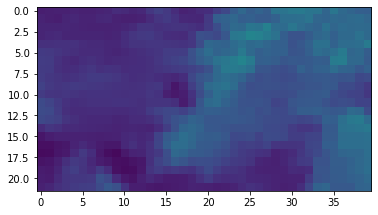

2020-02-19 00:00:00


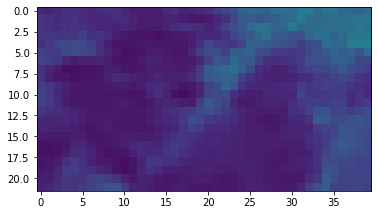

2020-02-21 00:00:00


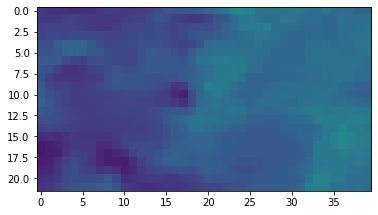

2020-02-24 00:00:00


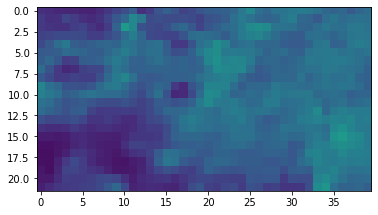

2020-02-28 00:00:00


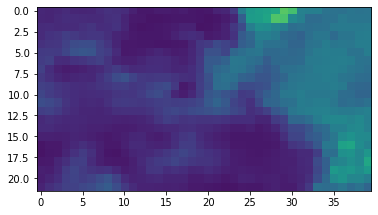

2020-03-01 00:00:00


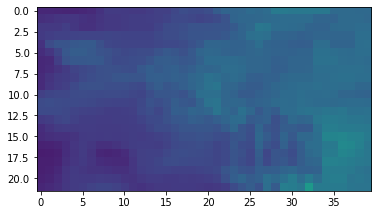

2020-03-03 00:00:00


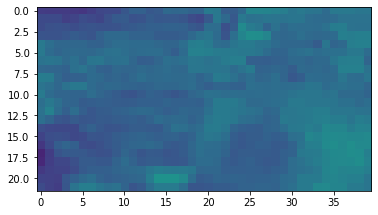

2020-03-06 00:00:00


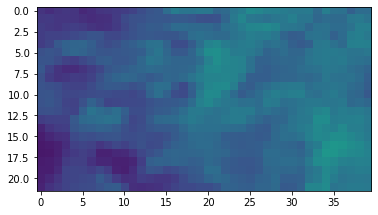

2020-03-09 00:00:00


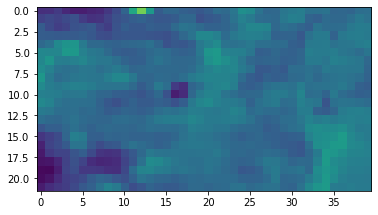

2020-03-11 00:00:00


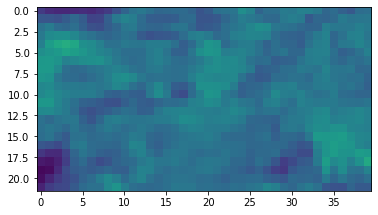

2020-03-12 00:00:00


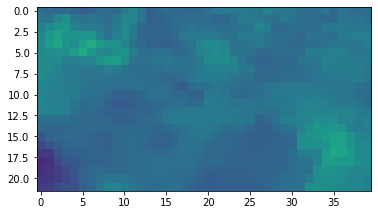

2020-03-15 00:00:00


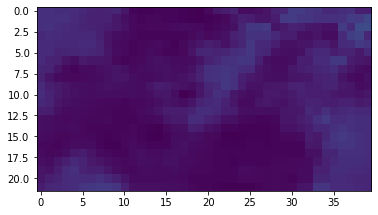

2020-03-17 00:00:00


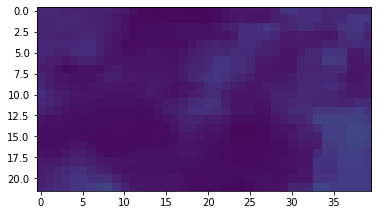

2020-03-18 00:00:00


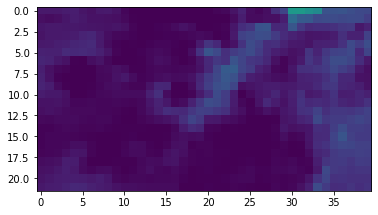

2020-03-19 00:00:00


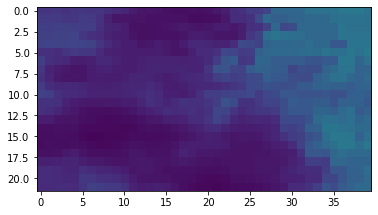

2020-03-21 00:00:00


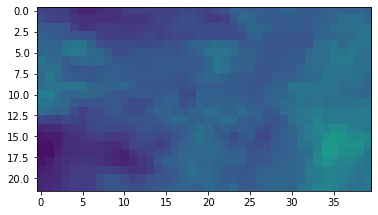

2020-03-23 00:00:00


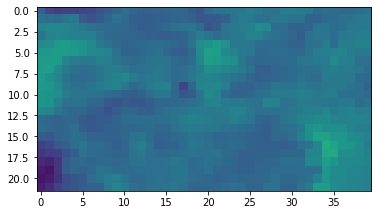

2020-04-07 00:00:00


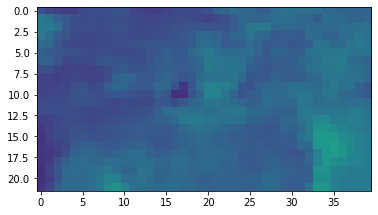

2020-04-09 00:00:00


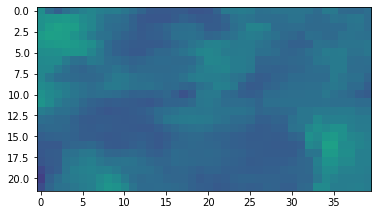

2020-04-11 00:00:00


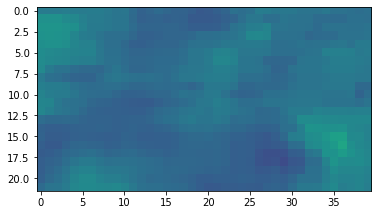

2020-04-16 00:00:00


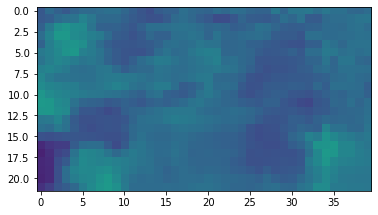

2020-04-25 00:00:00


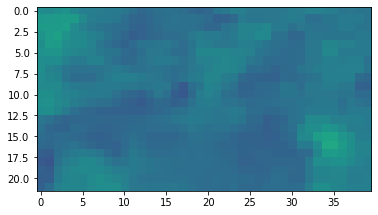

2020-05-01 00:00:00


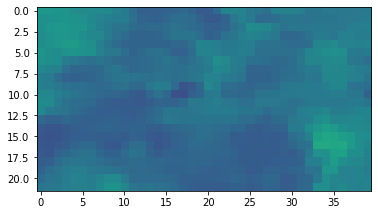

2020-05-02 00:00:00


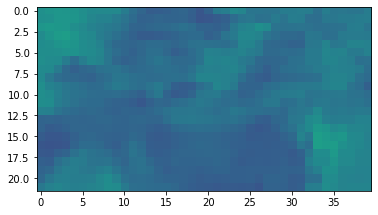

2020-05-05 00:00:00


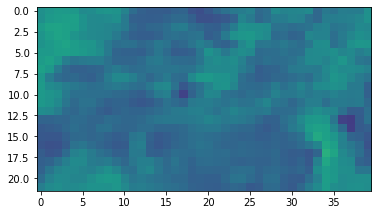

2020-05-08 00:00:00


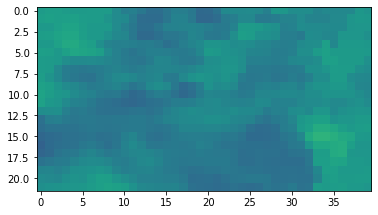

2020-05-11 00:00:00


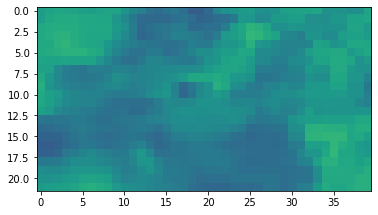

2020-05-14 00:00:00


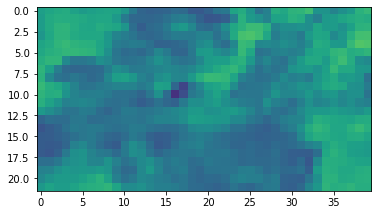

2020-05-28 00:00:00


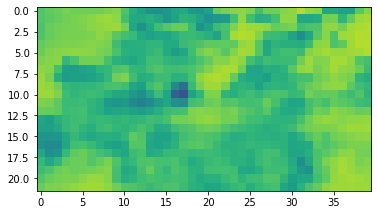

2020-06-05 00:00:00


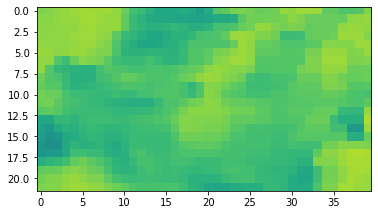

2020-06-08 00:00:00


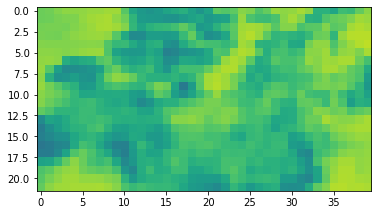

2020-06-15 00:00:00


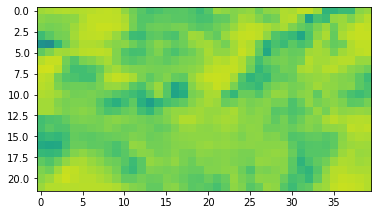

2020-06-17 00:00:00


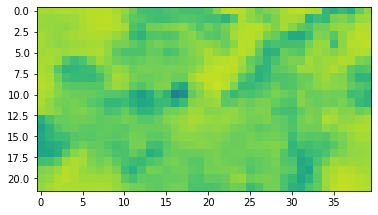

2020-07-31 00:00:00


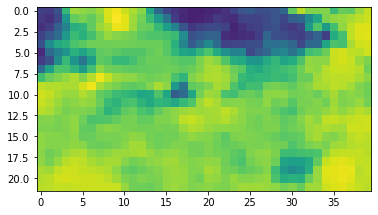

2020-08-10 00:00:00


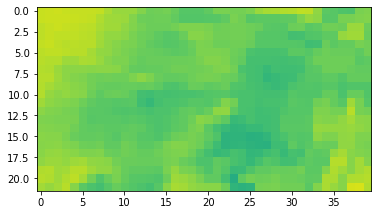

2020-08-14 00:00:00


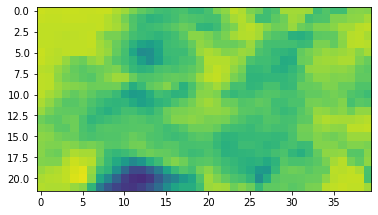

2020-08-15 00:00:00


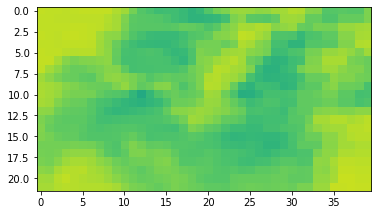

2020-08-16 00:00:00


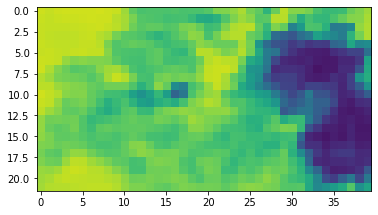

2020-08-18 00:00:00


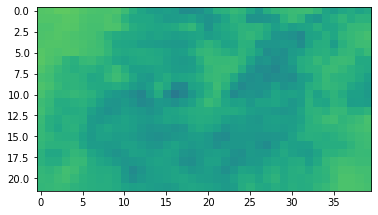

2020-08-19 00:00:00


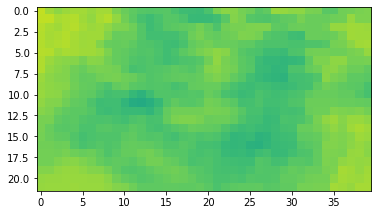

2020-08-20 00:00:00


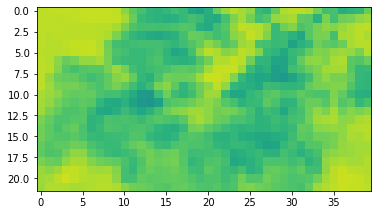

2020-08-25 00:00:00


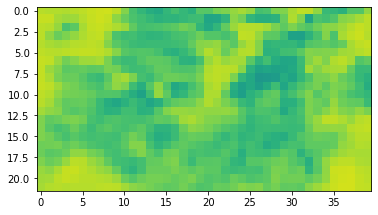

2020-09-30 00:00:00


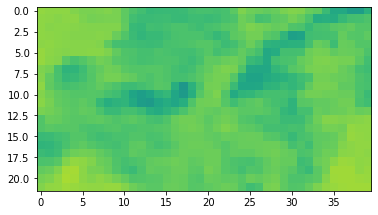

2020-10-02 00:00:00


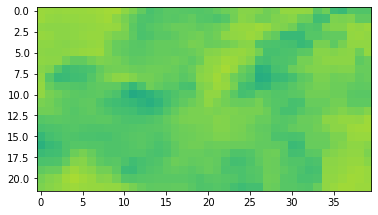

2020-10-16 00:00:00


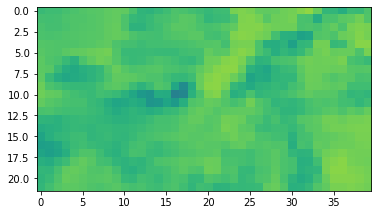

2020-10-25 00:00:00


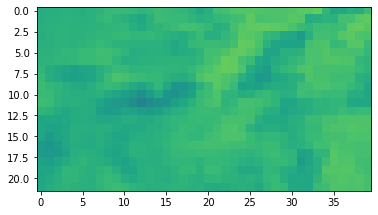

2020-11-08 00:00:00


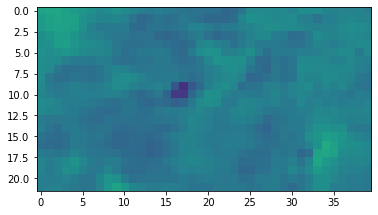

2020-11-10 00:00:00


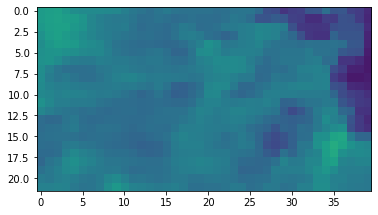

2020-11-12 00:00:00


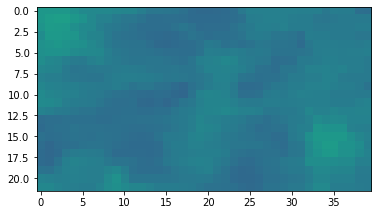

2020-11-13 00:00:00


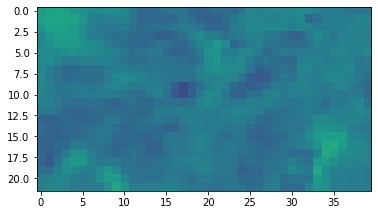

2020-11-15 00:00:00


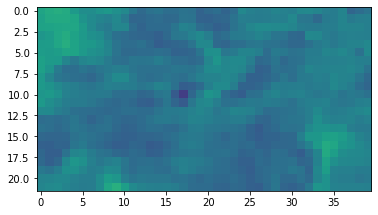

2020-11-17 00:00:00


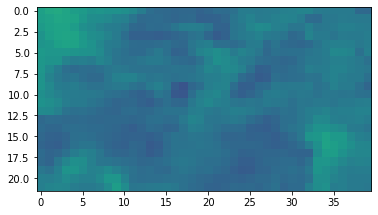

2020-11-18 00:00:00


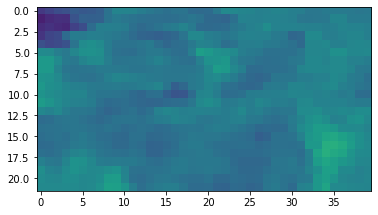

2020-11-22 00:00:00


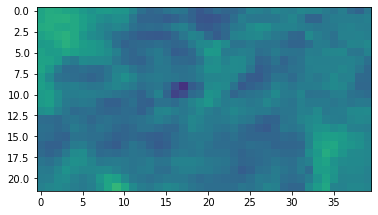

2020-11-24 00:00:00


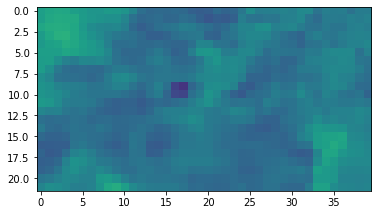

2020-11-25 00:00:00


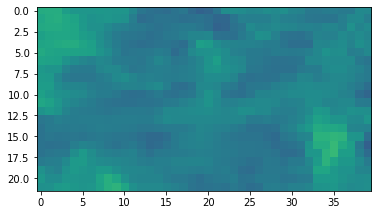

2020-12-01 00:00:00


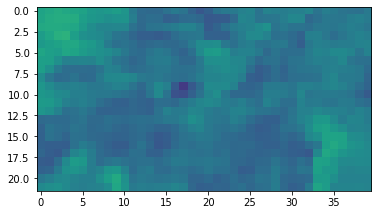

2020-12-06 00:00:00


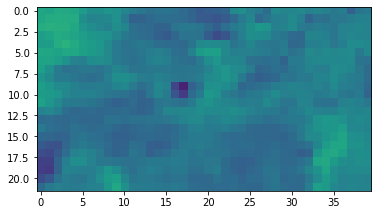

2020-12-10 00:00:00


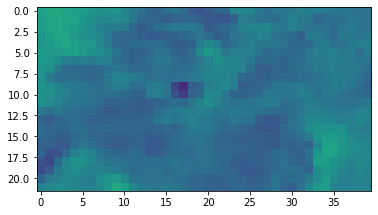

2020-12-17 00:00:00


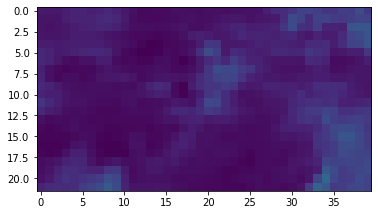

2020-12-21 00:00:00


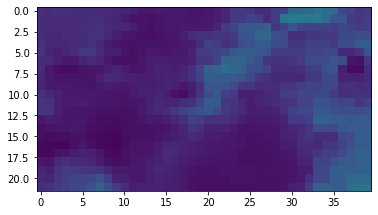

2020-12-22 00:00:00


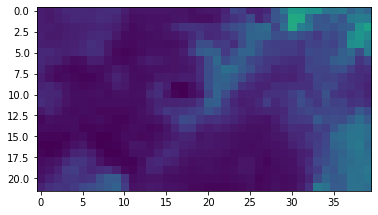

2020-12-23 00:00:00


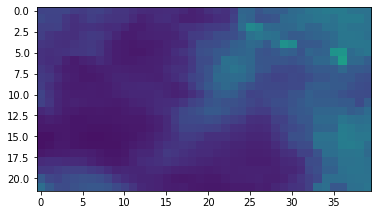

2020-12-26 00:00:00


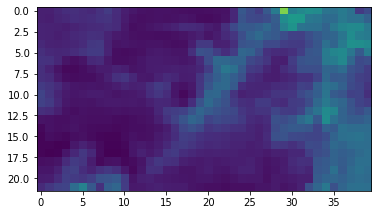

2020-12-27 00:00:00


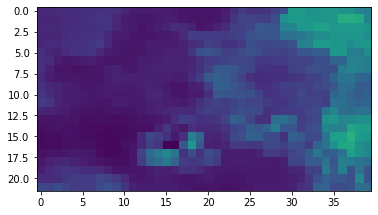

In [7]:
for img, date in zip(imgs_terra, terra_date_list):
    print(date)
    plt.imshow(img, vmax=1, vmin=0)
    plt.show()

2020-01-01 00:00:00


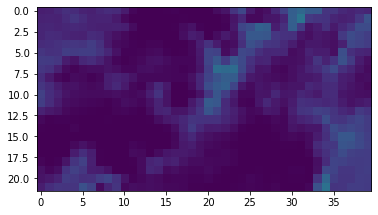

2020-01-02 00:00:00


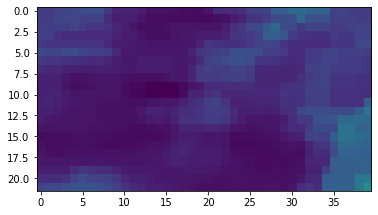

2020-01-04 00:00:00


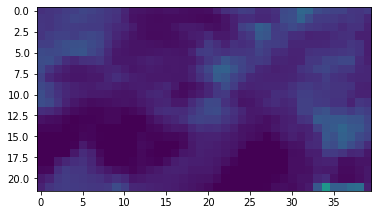

2020-01-06 00:00:00


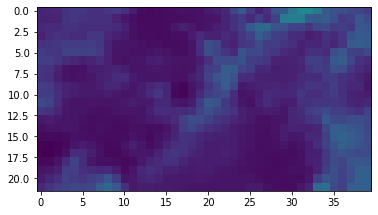

2020-01-08 00:00:00


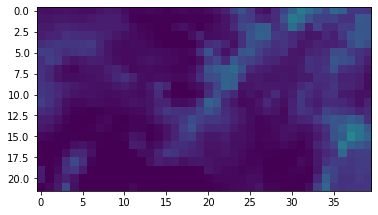

2020-01-10 00:00:00


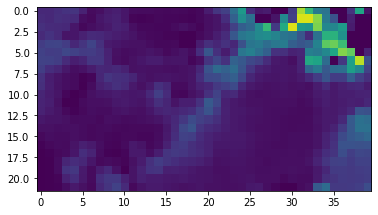

2020-01-11 00:00:00


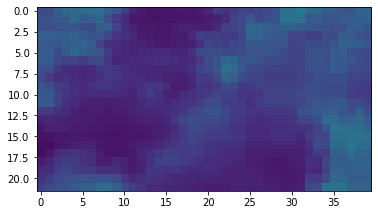

2020-01-17 00:00:00


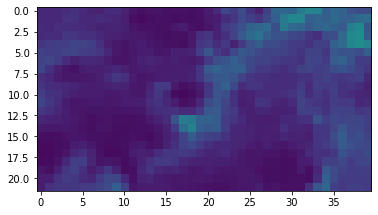

2020-01-19 00:00:00


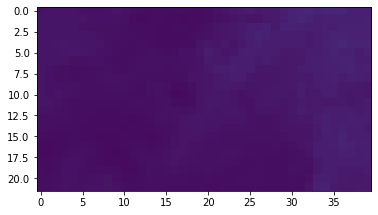

2020-01-22 00:00:00


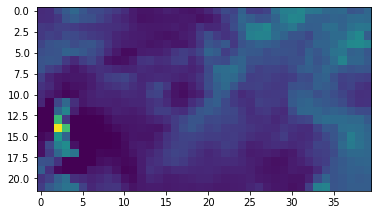

2020-01-26 00:00:00


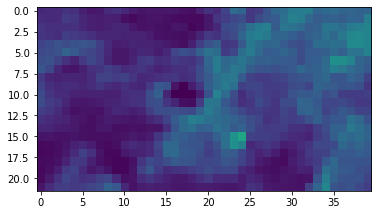

2020-01-29 00:00:00


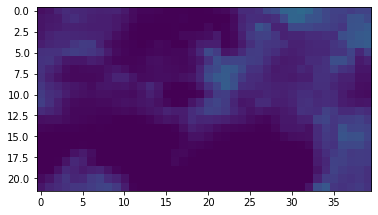

2020-02-03 00:00:00


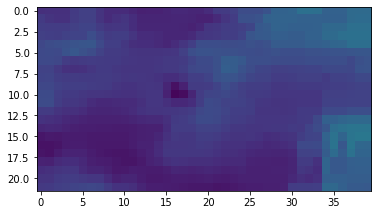

2020-02-04 00:00:00


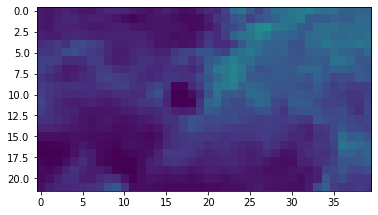

2020-02-07 00:00:00


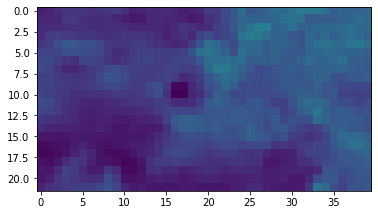

2020-02-11 00:00:00


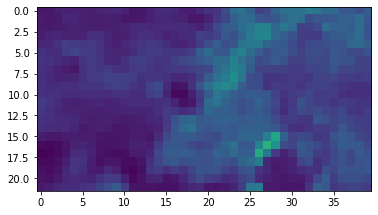

2020-02-13 00:00:00


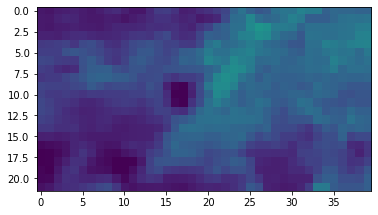

2020-02-19 00:00:00


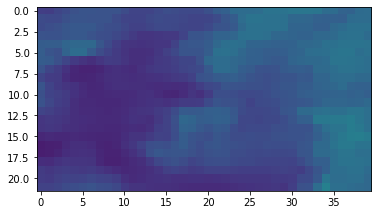

2020-02-21 00:00:00


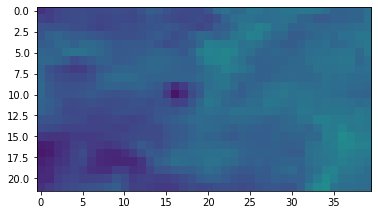

2020-02-24 00:00:00


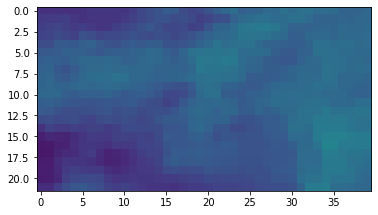

2020-03-01 00:00:00


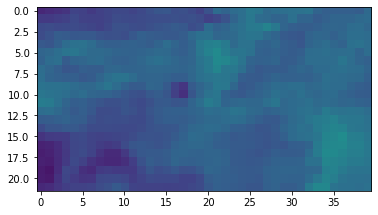

2020-03-03 00:00:00


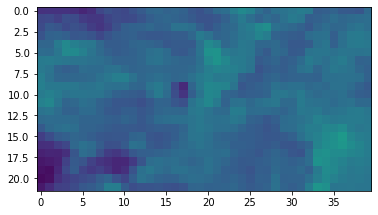

2020-03-06 00:00:00


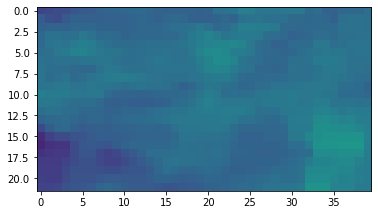

2020-03-07 00:00:00


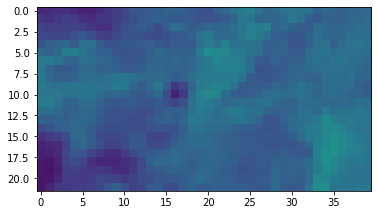

2020-03-15 00:00:00


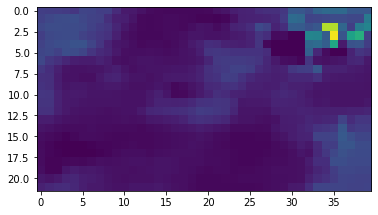

2020-03-17 00:00:00


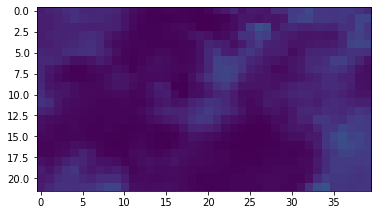

2020-03-18 00:00:00


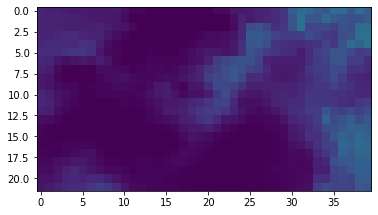

2020-03-19 00:00:00


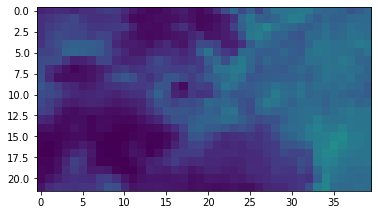

2020-03-23 00:00:00


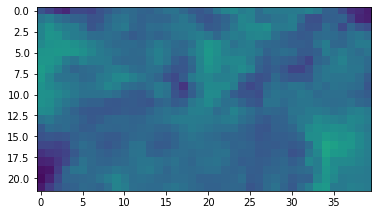

2020-03-26 00:00:00


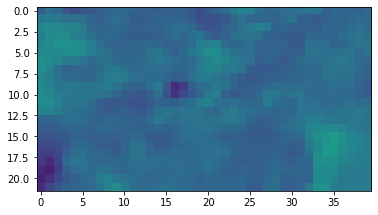

2020-04-06 00:00:00


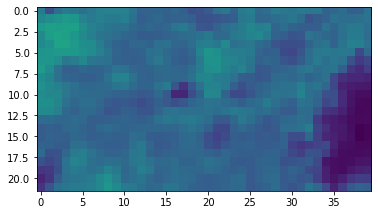

2020-04-09 00:00:00


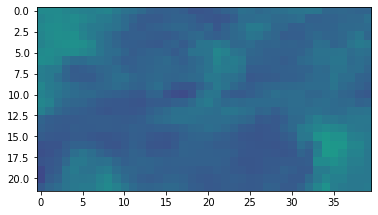

2020-04-11 00:00:00


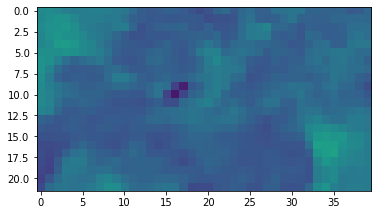

2020-04-16 00:00:00


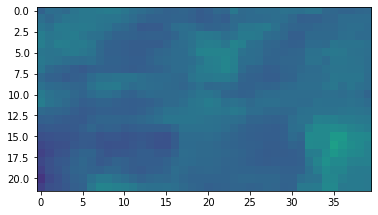

2020-04-17 00:00:00


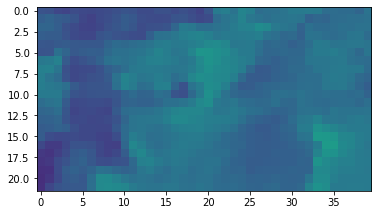

2020-04-25 00:00:00


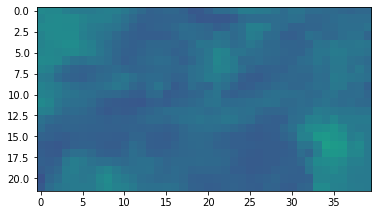

2020-04-27 00:00:00


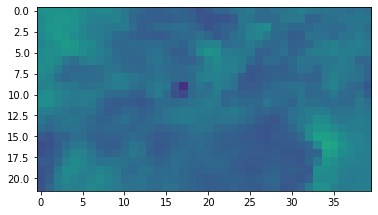

2020-04-29 00:00:00


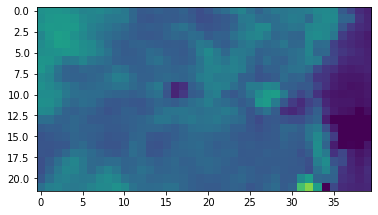

2020-05-01 00:00:00


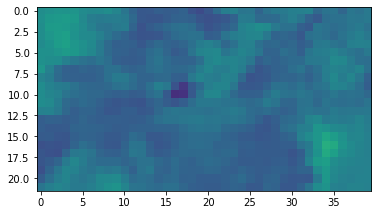

2020-05-02 00:00:00


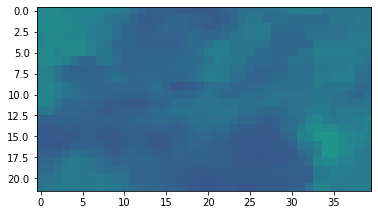

2020-05-08 00:00:00


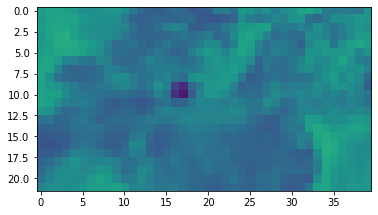

2020-05-11 00:00:00


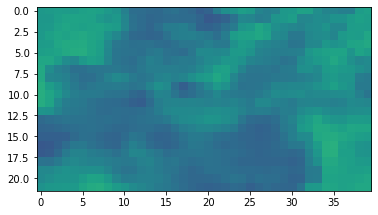

2020-05-13 00:00:00


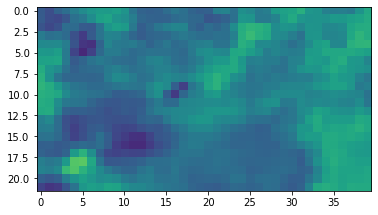

2020-05-14 00:00:00


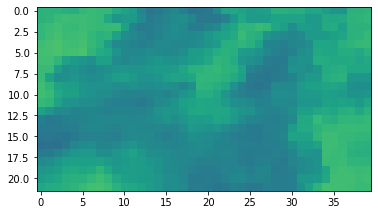

2020-05-28 00:00:00


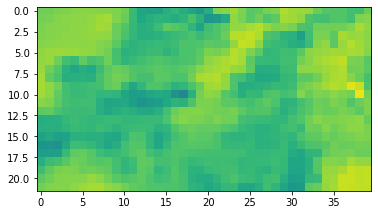

2020-06-05 00:00:00


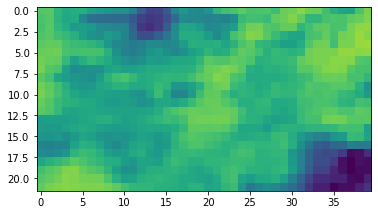

2020-06-08 00:00:00


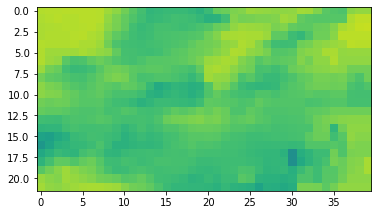

2020-06-20 00:00:00


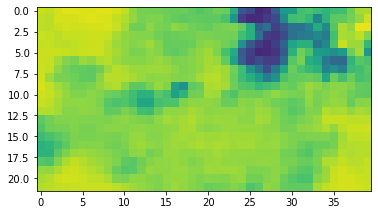

2020-08-12 00:00:00


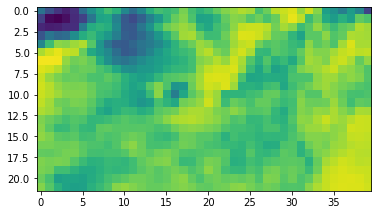

2020-08-14 00:00:00


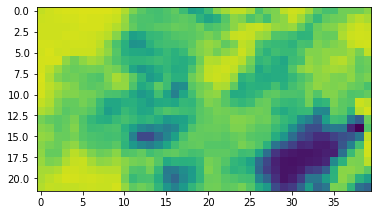

2020-08-17 00:00:00


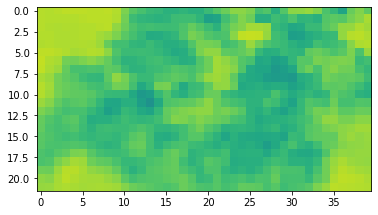

2020-09-19 00:00:00


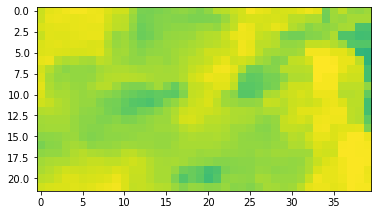

2020-10-02 00:00:00


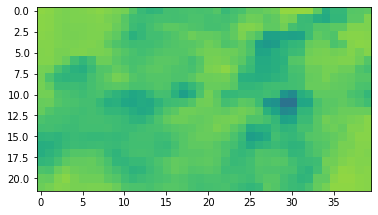

2020-10-16 00:00:00


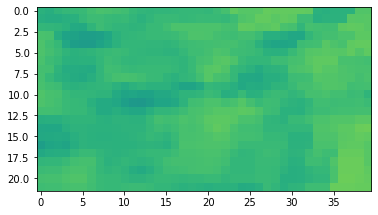

2020-10-29 00:00:00


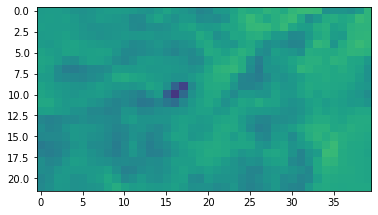

2020-10-31 00:00:00


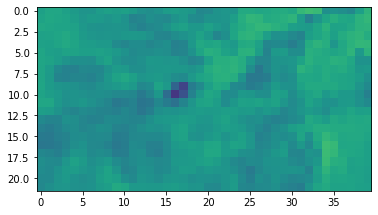

2020-11-05 00:00:00


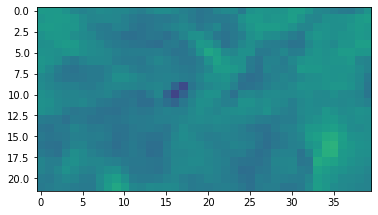

2020-11-09 00:00:00


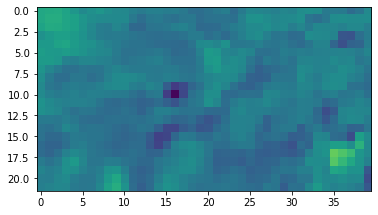

2020-11-12 00:00:00


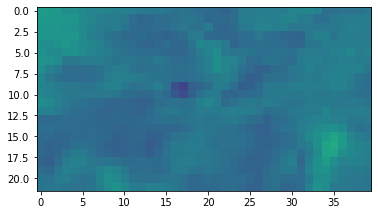

2020-11-14 00:00:00


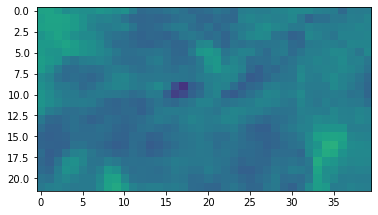

2020-11-17 00:00:00


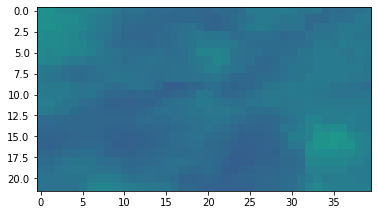

2020-11-18 00:00:00


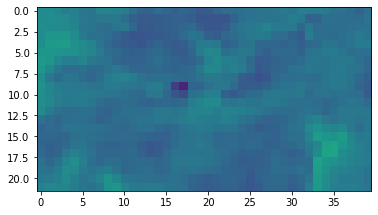

2020-11-21 00:00:00


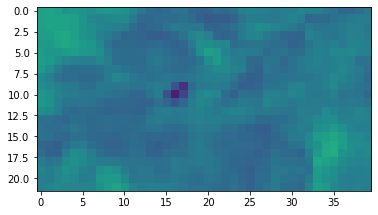

2020-11-23 00:00:00


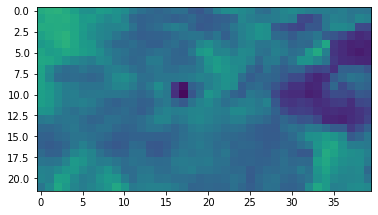

2020-11-25 00:00:00


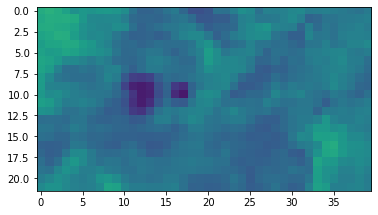

2020-12-01 00:00:00


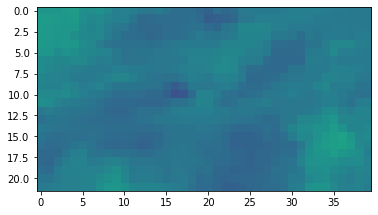

2020-12-02 00:00:00


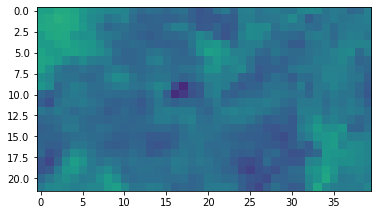

2020-12-03 00:00:00


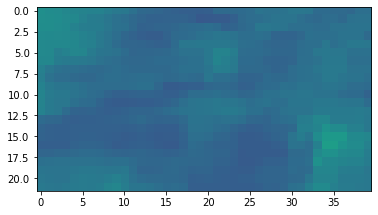

2020-12-04 00:00:00


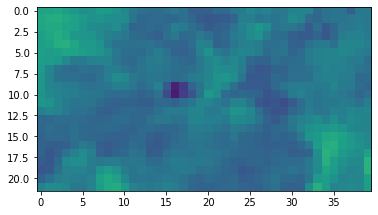

2020-12-05 00:00:00


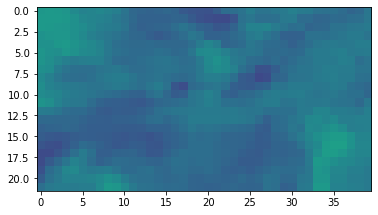

2020-12-06 00:00:00


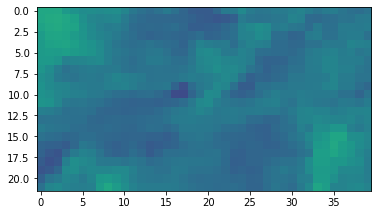

2020-12-07 00:00:00


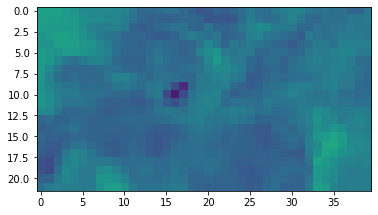

2020-12-09 00:00:00


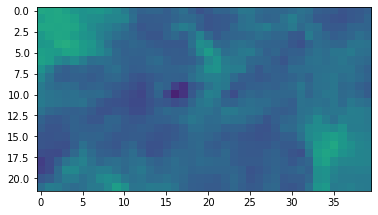

2020-12-21 00:00:00


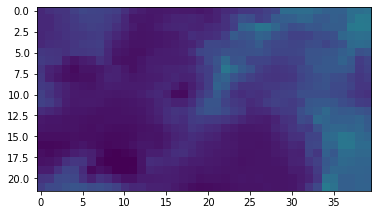

2020-12-22 00:00:00


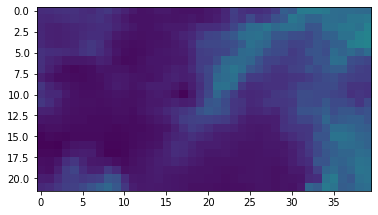

2020-12-23 00:00:00


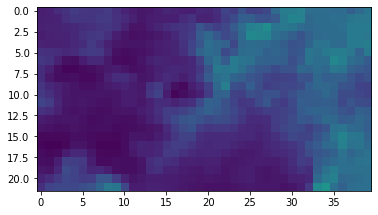

2020-12-27 00:00:00


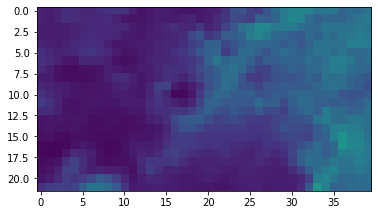

2020-12-28 00:00:00


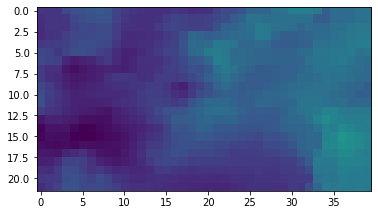

In [8]:
for img, date in zip(imgs_aqua, aqua_date_list):
    print(date)
    plt.imshow(img, vmax=1, vmin=0)
    plt.show()

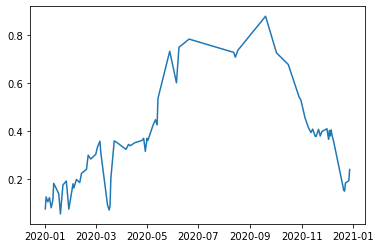

In [144]:
plt.plot(aqua_date_list, np.mean(np.mean(imgs_aqua, axis=1), axis=1))

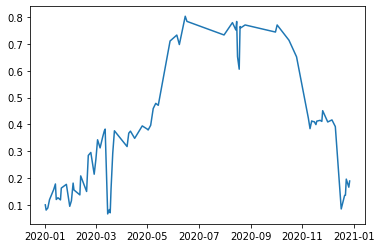

In [145]:
plt.plot(terra_date_list, np.mean(np.mean(imgs_terra, axis=1), axis=1))

# Time-series filtering

## Median filter

In [9]:
scale = 25
window_size = 3
window_size_narrow = 0
date_str_list = ['0126', '0303', '0425', '0502', '0820', '1002', '1108', '1201']
sen_date_str_list = ['0127','0303','0420','0502','0818','1005','1110','1204']

mae_list = [[], [], []] # just, mean, median
coef_list = [[], [], []]

for date_str, sen_date_str in zip(date_str_list, sen_date_str_list):

    target_date = datetime.datetime.strptime('2020'+date_str, '%Y%m%d')

    sen = np.load(f'../sar_2_ndvi/tsumagoi/bin/pixel_resized/collocate_nn_{sen_date_str}.npy')
    sen_ndvi = cal_ndvi(sen[4], sen[5])
    sen_ndvi = drop_resolution(sen_ndvi)[0]
    
    start_date = target_date - datetime.timedelta(days=window_size)
    end_date = target_date + datetime.timedelta(days=window_size)

    target_imgs = []
    for date, img in zip(all_date_list, imgs_all):
        if start_date <= date <= end_date:
            target_imgs.append(img.repeat(scale, axis=0).repeat(scale, axis=1))
    target_imgs = np.array(target_imgs)
    
    start_date_narrow = target_date - datetime.timedelta(days=window_size_narrow)
    end_date_narrow = target_date + datetime.timedelta(days=window_size_narrow)
    
    target_imgs_narrow = []
    for date, img in zip(all_date_list, imgs_all):
        if start_date_narrow <= date <= end_date_narrow:
            target_imgs_narrow.append(img.repeat(scale, axis=0).repeat(scale, axis=1))
    target_imgs_narrow = np.array(target_imgs_narrow)
    
    print('Just-date')
    print('MAE, ', mean_absolute_error(sen_ndvi, np.mean(target_imgs_narrow, axis=0)))
    print('Coef, ', np.corrcoef(np.ravel(sen_ndvi), np.ravel(np.mean(target_imgs_narrow, axis=0)))[0][1])
    
    print('Mean')
    print('MAE, ', mean_absolute_error(sen_ndvi, np.mean(target_imgs, axis=0)))
    print('Coef, ', np.corrcoef(np.ravel(sen_ndvi), np.ravel(np.mean(target_imgs, axis=0)))[0][1])
    
    print('Median')
    print('MAE, ', mean_absolute_error(sen_ndvi, np.median(target_imgs, axis=0)))
    print('Coef, ', np.corrcoef(np.ravel(sen_ndvi), np.ravel(np.median(target_imgs, axis=0)))[0][1])
    
    mae_list[0].append(mean_absolute_error(sen_ndvi, np.mean(target_imgs_narrow, axis=0)))
    mae_list[1].append(mean_absolute_error(sen_ndvi, np.mean(target_imgs, axis=0)))
    mae_list[2].append(mean_absolute_error(sen_ndvi, np.median(target_imgs, axis=0)))
    
    coef_list[0].append(np.corrcoef(np.ravel(sen_ndvi), np.ravel(np.mean(target_imgs_narrow, axis=0)))[0][1])
    coef_list[1].append(np.corrcoef(np.ravel(sen_ndvi), np.ravel(np.mean(target_imgs, axis=0)))[0][1])
    coef_list[2].append(np.corrcoef(np.ravel(sen_ndvi), np.ravel(np.median(target_imgs, axis=0)))[0][1])

Just-date
MAE,  0.06189042141565799
Coef,  0.6843572575146781
Mean
MAE,  0.07281515525325574
Coef,  0.6692739421099028
Median
MAE,  0.06830568133523643
Coef,  0.673025915416299
Just-date
MAE,  0.05493896175546317
Coef,  0.6064822465024619
Mean
MAE,  0.05990172281004064
Coef,  0.5735787966010828
Median
MAE,  0.0560633333331101
Coef,  0.5834496033227323
Just-date
MAE,  0.05652352223088118
Coef,  0.7679758333342268
Mean
MAE,  0.05284321593538731
Coef,  0.7346992047562041
Median
MAE,  0.04870146695439788
Coef,  0.8143703540072743
Just-date
MAE,  0.05922262331851843
Coef,  0.7767521747522369
Mean
MAE,  0.056423125186384766
Coef,  0.8072248196372563
Median
MAE,  0.05708547837566584
Coef,  0.8219967221639672
Just-date
MAE,  0.08521015566181055
Coef,  0.690165152124288
Mean
MAE,  0.09204173924207891
Coef,  0.6383445952076
Median
MAE,  0.08760011321441694
Coef,  0.7034324098360687
Just-date
MAE,  0.06265860243742777
Coef,  0.6936404729020179
Mean
MAE,  0.0626141300403767
Coef,  0.72587990217289

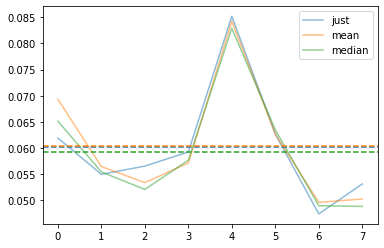

In [239]:
plt.plot(mae_list[0], label='just', alpha=0.5)
plt.plot(mae_list[1], label='mean', alpha=0.5)
plt.plot(mae_list[2], label='median', alpha=0.5)
plt.axhline(y=np.mean(mae_list[0]), xmin=0, xmax=7, linestyle='--', color='C0')
plt.axhline(y=np.mean(mae_list[1]), xmin=0, xmax=7, linestyle='--', color='C1')
plt.axhline(y=np.mean(mae_list[2]), xmin=0, xmax=7, linestyle='--', color='C2')
plt.legend()

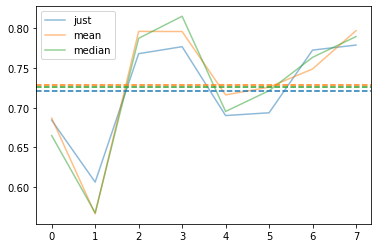

In [238]:
plt.plot(coef_list[0], label='just', alpha=0.5)
plt.plot(coef_list[1], label='mean', alpha=0.5)
plt.plot(coef_list[2], label='median', alpha=0.5)
plt.axhline(y=np.mean(coef_list[0]), xmin=0, xmax=7, linestyle='--', color='C0')
plt.axhline(y=np.mean(coef_list[1]), xmin=0, xmax=7, linestyle='--', color='C1')
plt.axhline(y=np.mean(coef_list[2]), xmin=0, xmax=7, linestyle='--', color='C2')
plt.legend()

### Save median-ensemble ndvi with Sentinel-1 and DEM

In [182]:
scale = 25
window_size = 3
w = 720
h = 930
date_str_list = ['0110','0122','0215','0310','0322','0403','0415','0509','0602','0614','0813','0906','0918','1024','1105','1117']
# ['0103', '0115', '0127', '0220', '0303', '0315', '0408', '0420', '0502', '0514', '0526', '0607', '0619', '0818', '1005', '1017', '1029', '1110', '1122', '1204', '1216']

# DEM
dem_sen = np.load('../sar_2_ndvi/oushu/bin/pixel_resized_/test_0626.npy')
dem_sen = standarlization(dem_sen)[6] # [6,:h,:w]

for date_str in date_str_list:
    
    # NDVI
    target_date = datetime.datetime.strptime('2020'+date_str, '%Y%m%d')
    
    start_date = target_date - datetime.timedelta(days=window_size)
    end_date = target_date + datetime.timedelta(days=window_size)

    target_imgs = []
    for date, img in zip(all_date_list, imgs_all):
        if start_date <= date <= end_date:
            target_imgs.append(img)
    target_imgs = np.array(target_imgs)
    ens_ndvi = np.median(target_imgs, axis=0).astype(np.float32)
    
    # SAR
    sar = np.load(f'../sar_2_ndvi/oushu/time_series/bin/pixel_resized_/s1/s1_{date_str}.npy')
    if sar.shape[1:] != (h,w):
        sar = resize_array_3d(sar, h, w)
    vh = standarlization(sar[0])
    vv = standarlization(sar[1])
    img_std = np.array([ens_ndvi, vh, vv, dem_sen]).astype(np.float32)
    
    np.save(f'../sar_2_ndvi/oushu/time_series/bin/pixel_resized_/collocate_mod_{date_str}.npy', img_std)

In [22]:
all_date_list = [datetime.datetime.strptime('2020'+path[-8:-4], '%Y%m%d') for path in sorted(glob.glob(os.path.join(data_dir, 'bin/pixel_resized/*.npy')))]
imgs_all = np.load('../sar_2_ndvi/biei/modis/bin/all.npy')

In [25]:
# For general
scale = 25
window_size = 3

test_h = 1286
test_w = 1852

date_str_s1_list = ['0415', '0602', '0930']
date_str_mod_list = ['0418', '0601', '0929']
mae_list = []
coef_list = []


for date_str_s1,date_str_mod in zip(date_str_s1_list, date_str_mod_list):
    
    # DEM & SAR
    sen = np.load(f'../sar_2_ndvi/biei/bin/pixel_resized/collocate_{date_str_s1}.npy')
    dem_sen = standarlization(sen[6]) # [6,:h,:w]
    vh = standarlization(sen[0])
    vv = standarlization(sen[1])
    
    # NDVI
    target_date = datetime.datetime.strptime('2020'+date_str_mod, '%Y%m%d')
    
    start_date = target_date - datetime.timedelta(days=window_size)
    end_date = target_date + datetime.timedelta(days=window_size)

    target_imgs = []
    for date, img in zip(all_date_list, imgs_all):
        if start_date <= date <= end_date:
            target_imgs.append(img)
    target_imgs = np.array(target_imgs)
    ens_ndvi = np.median(target_imgs, axis=0).astype(np.float32)
    
    img_std = np.array([ens_ndvi, vh, vv, dem_sen]).astype(np.float32)
    
    mae = mean_absolute_error(drop_resolution(img_std[0])[0][:test_h, :test_w], drop_resolution(cal_ndvi(sen[4], sen[5]))[0][:test_h, :test_w])
    coef = np.corrcoef(np.ravel(drop_resolution(img_std[0])[0][:test_h, :test_w]), np.ravel(drop_resolution(cal_ndvi(sen[4], sen[5]))[0][:test_h, :test_w]))[0][1]
    mae_list.append(mae)
    coef_list.append(coef)
    print(mae, coef)
    np.save(f'../sar_2_ndvi/biei/modis/bin/input/collocate_mod_{date_str_s1}.npy', img_std)

0.063437786671226 0.676482109261005
0.08956502893545763 0.7942391687843857
0.08603089514411058 0.7977655176123442


In [111]:
# For Niigata (stitch Modis image)
scale = 25
window_size = 3
w = 1193
h = 1723

date_str = '1123'
main_path_list = ['mod_1118','mod_1117','mod_1119','myd_1117','myd_1115']
edge_path_list = ['mod_edge_1118', 'myd_edge_1117', 'myd_edge_1115']

img_list = []
for edge_path in edge_path_list:
    edge_img = np.load(f'../sar_2_ndvi/niigata/modis/bin/raw/{edge_path}.npy')
    img_list.append(cal_ndvi(edge_img[0], edge_img[1]))

for main_path in main_path_list:
    main_img = np.load(f'../sar_2_ndvi/niigata/modis/bin/raw/{main_path}.npy')
    img_list.append(cal_ndvi(main_img[0], main_img[1]))

img_list = np.array(img_list)
ens_ndvi = interpolate_img(np.nanmedian(img_list, axis=0))

# DEM & SAR
sen = np.load(f'../sar_2_ndvi/niigata/bin/pixel_resized/collocate_nn_{date_str}.npy')
dem_sen = standarlization(sen[6]) # [6,:h,:w]
vh = standarlization(sen[0])
vv = standarlization(sen[1])

img_std = np.array([ens_ndvi, vh, vv, dem_sen]).astype(np.float32)

print(mean_absolute_error(drop_resolution(img_std[0])[0], drop_resolution(cal_ndvi(sen[4], sen[5]))[0]))
np.save(f'../sar_2_ndvi/niigata/modis/bin/pixel_resized/collocate_mod_{date_str}.npy', img_std)

/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


0.08149969032050597


In [140]:
city = 'niigata'
date_s1_list = ['0421','0503','0608','0620'] # ['0325', '0605', '0804']
date_mod_list = ['0425','0502','0604','0621'] # ['0330', '0601', '0731']
mae_list = [[],[],[]]
coef_list = [[],[],[]]

for date_s1,date_mod in zip(date_s1_list,date_mod_list):
#     terra_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/raw/mod_{date_mod}.npy')
#     terra_ndvi = drop_resolution(cal_ndvi(terra_img[0], terra_img[1]))[0]

    # for niigata
    terra_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/raw/mod_{date_mod}.npy')
    terra_edge_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/raw/mod_edge_{date_mod}.npy')
    terra_ndvi = cal_ndvi(terra_img[0], terra_img[1])
    terra_edge_ndvi = cal_ndvi(terra_edge_img[0], terra_edge_img[1])
    img_list = np.array([terra_ndvi, terra_edge_ndvi])
    terra_ndvi = drop_resolution(interpolate_img(np.nanmedian(img_list, axis=0)))[0]
    
#     aqua_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/raw/myd_{date_mod}.npy')
#     aqua_ndvi = drop_resolution(cal_ndvi(aqua_img[0], aqua_img[1]))[0]

    # for niigata
    aqua_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/raw/myd_{date_mod}.npy')
    aqua_edge_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/raw/myd_edge_{date_mod}.npy')
    aqua_ndvi = cal_ndvi(aqua_img[0], aqua_img[1])
    aqua_edge_ndvi = cal_ndvi(aqua_edge_img[0], aqua_edge_img[1])
    img_list = np.array([aqua_ndvi, aqua_edge_ndvi])
    aqua_ndvi = drop_resolution(interpolate_img(np.nanmedian(img_list, axis=0)))[0]
    
    ens_img = np.load(f'../sar_2_ndvi/{city}/modis/bin/pixel_resized/collocate_mod_{date_s1}.npy')
    ens_ndvi = drop_resolution(ens_img[0])[0]
    
    sen_img = np.load(f'../sar_2_ndvi/{city}/bin/pixel_resized/collocate_nn_{date_s1}.npy')
    sen_ndvi = drop_resolution(cal_ndvi(sen_img[4], sen_img[5]))[0]
    
    mae_list[0].append(mean_absolute_error(sen_ndvi, terra_ndvi))
    mae_list[1].append(mean_absolute_error(sen_ndvi, aqua_ndvi))
    mae_list[2].append(mean_absolute_error(sen_ndvi, ens_ndvi))
    
    coef_list[0].append(np.corrcoef(np.ravel(sen_ndvi), np.ravel(terra_ndvi))[0][1])
    coef_list[1].append(np.corrcoef(np.ravel(sen_ndvi), np.ravel(aqua_ndvi))[0][1])
    coef_list[2].append(np.corrcoef(np.ravel(sen_ndvi), np.ravel(ens_ndvi))[0][1])
    
print(np.mean(mae_list, axis=1))
print(np.mean(coef_list, axis=1))

/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ryotanomura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users

[0.10405578 0.08209542 0.08965224]
[0.7752102  0.77935248 0.7980249 ]
